In [7]:
import numpy as np
import pandas as pd
import re
from PIL import Image
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
import random
from sklearn.model_selection import train_test_split
from sklearn import tree
import itertools

In [8]:
#bring in single image and convert to np array
img = Image.open("openlabeling/images/20181115_103532.jpg")
img.size
a = np.asarray(img)

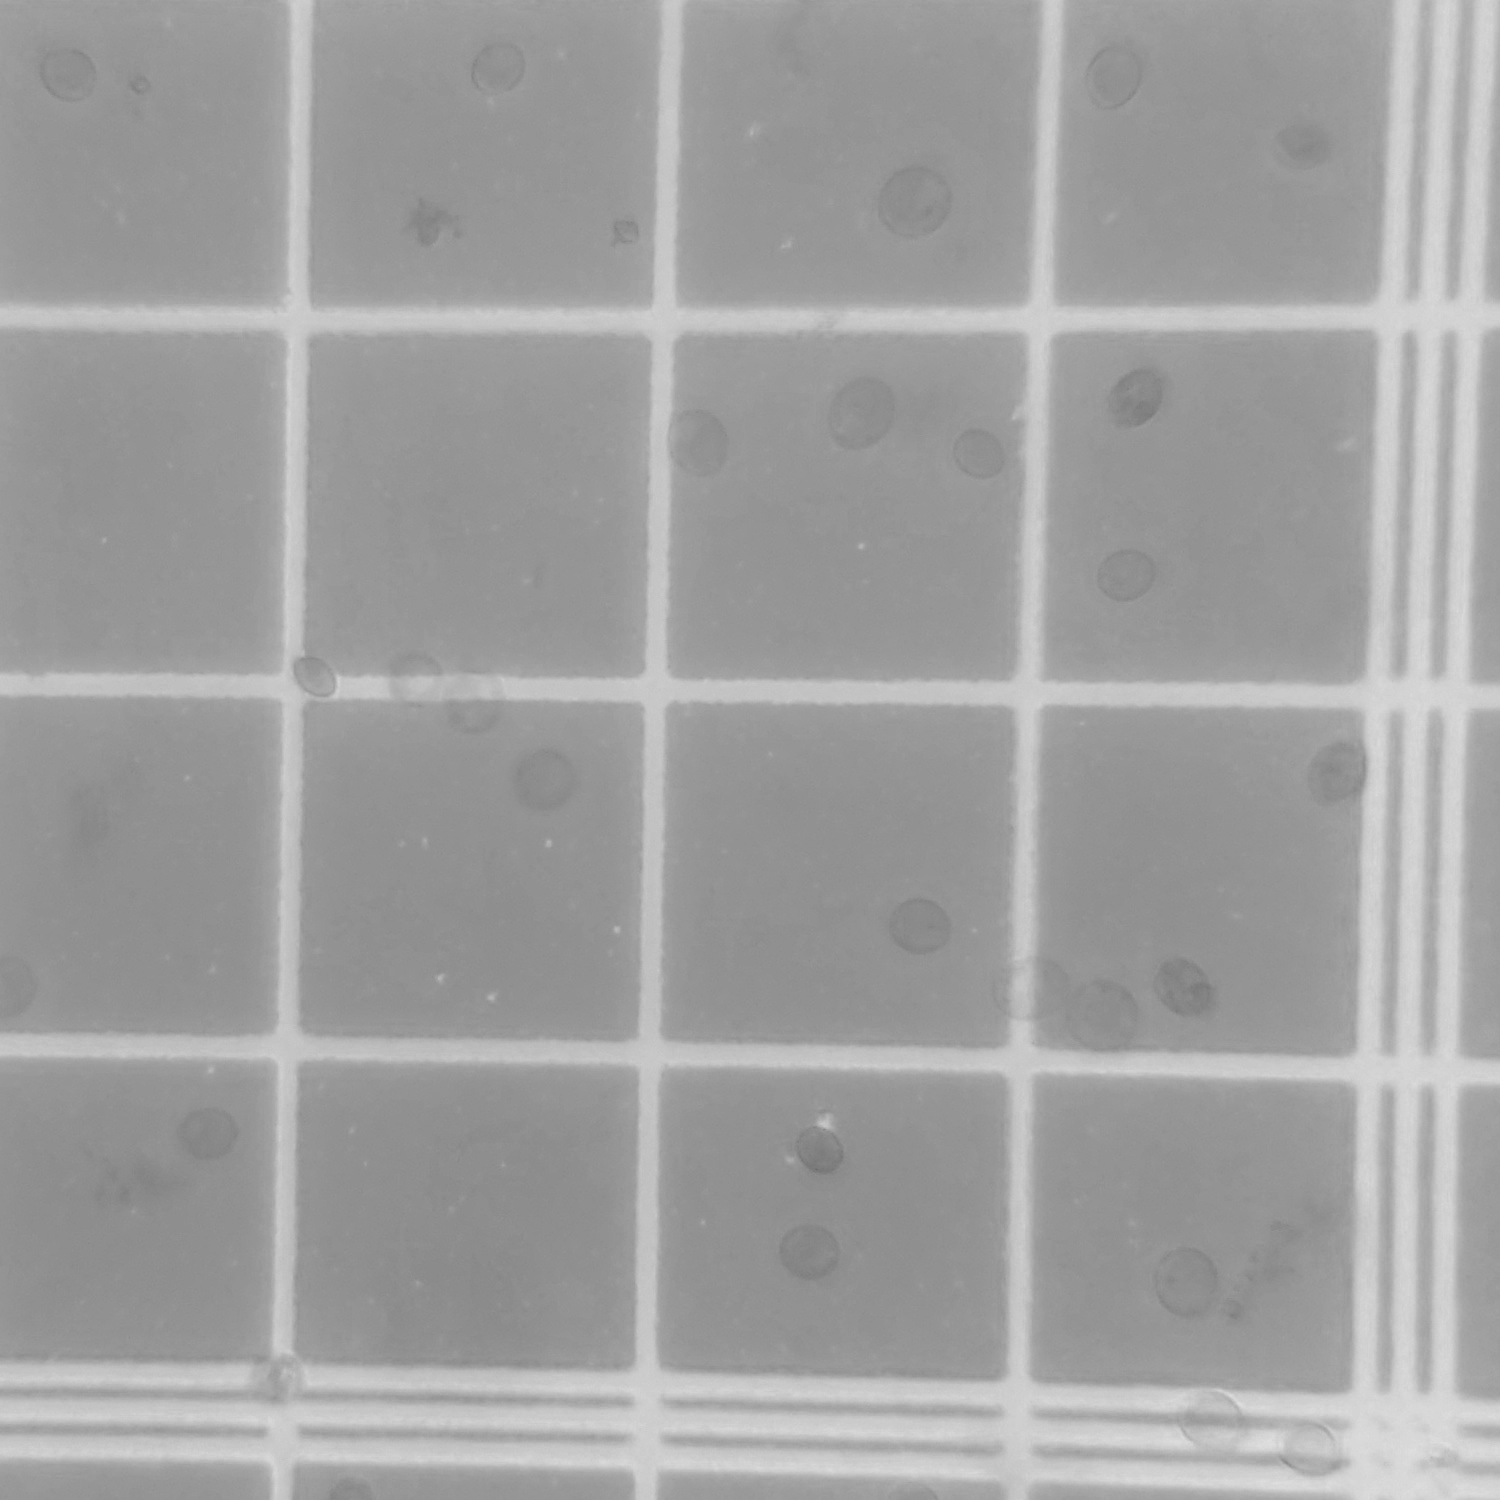

In [9]:
#break 3D array into 3 2D arrays for color channels
a[0,0,1]
color_chanel_0 = a[:,:,0]
color_chanel_1 = a[:,:,1]
color_chanel_2 = a[:,:,2]

#convert one channel 2D array back to and image and display 
i = Image.fromarray(color_chanel_2)
i

Working with 50 images
Image examples: 
20181115_110516.jpg


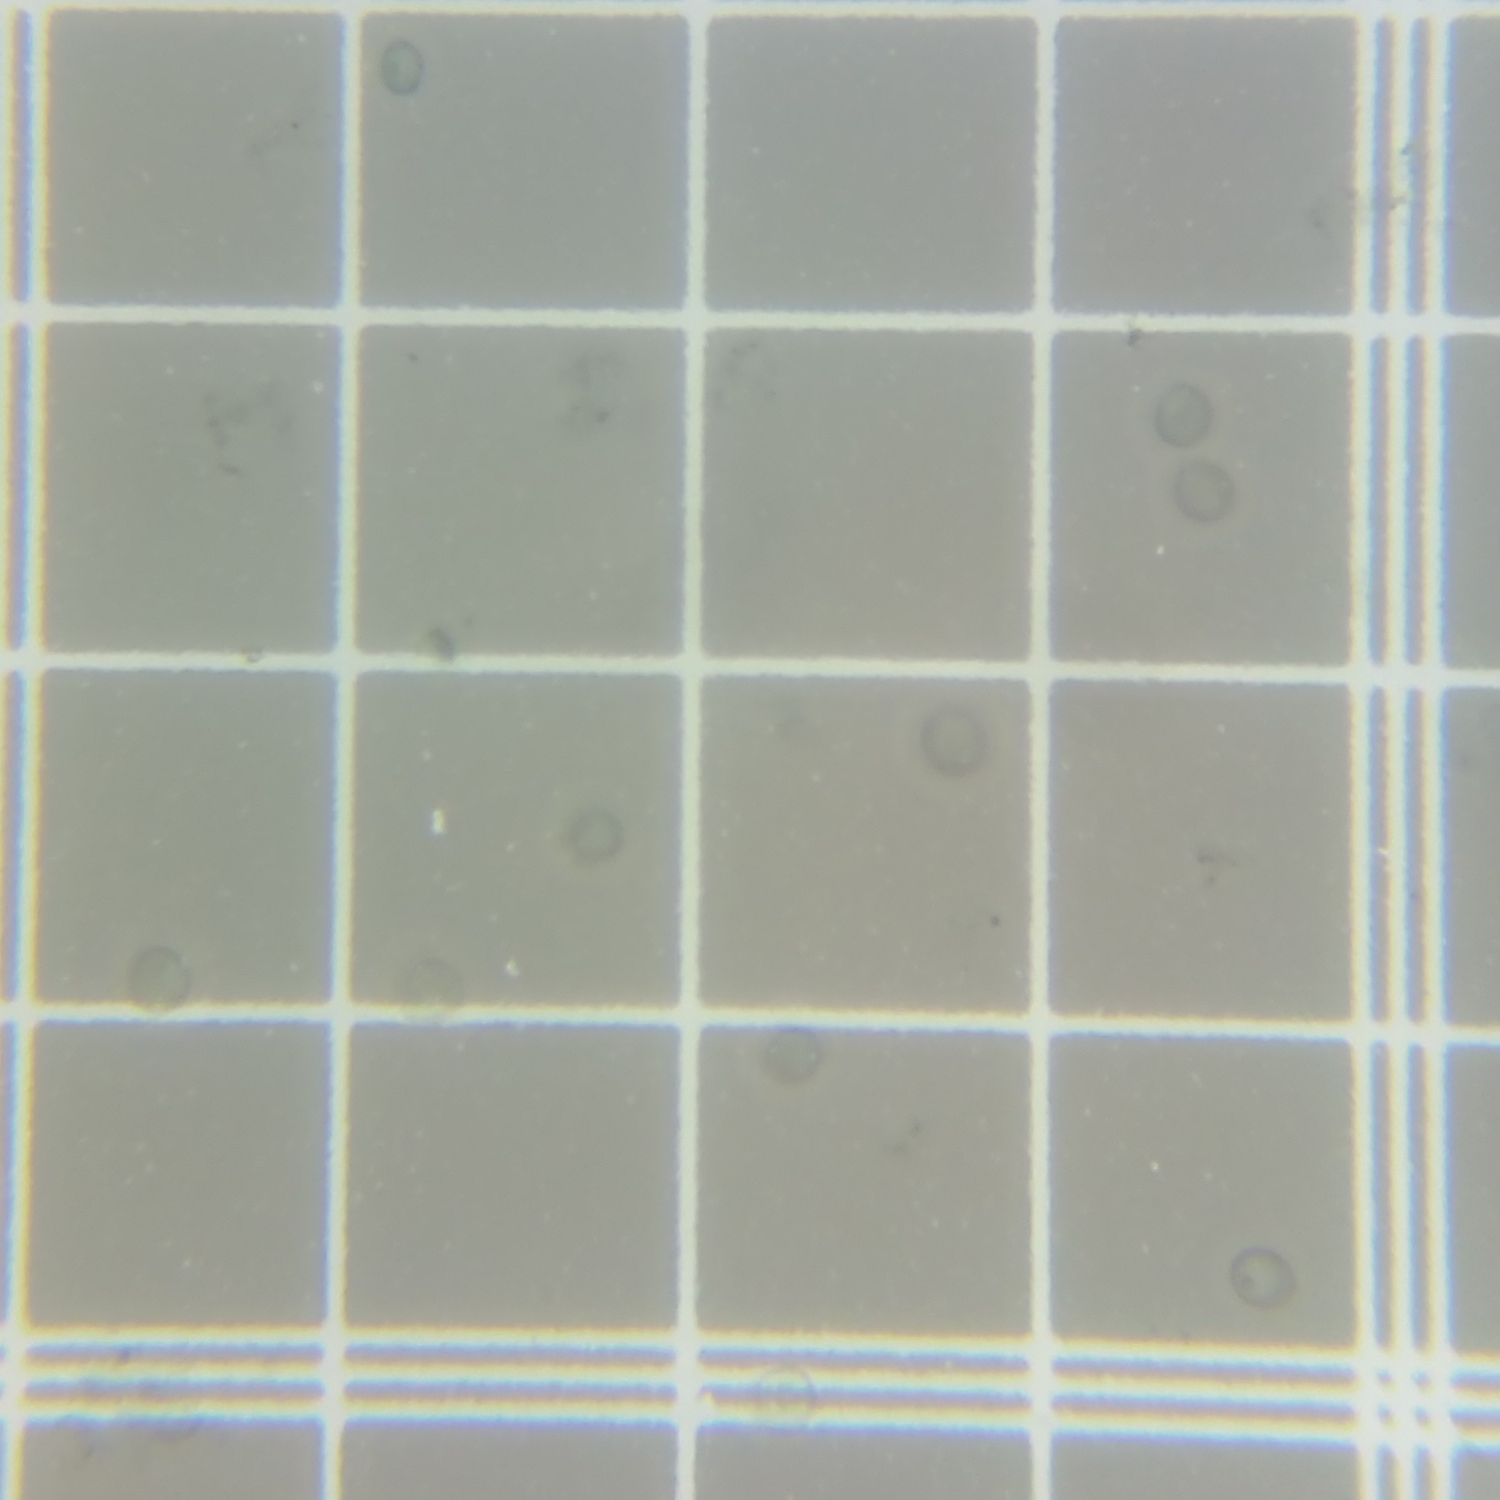

20181115_104653.jpg


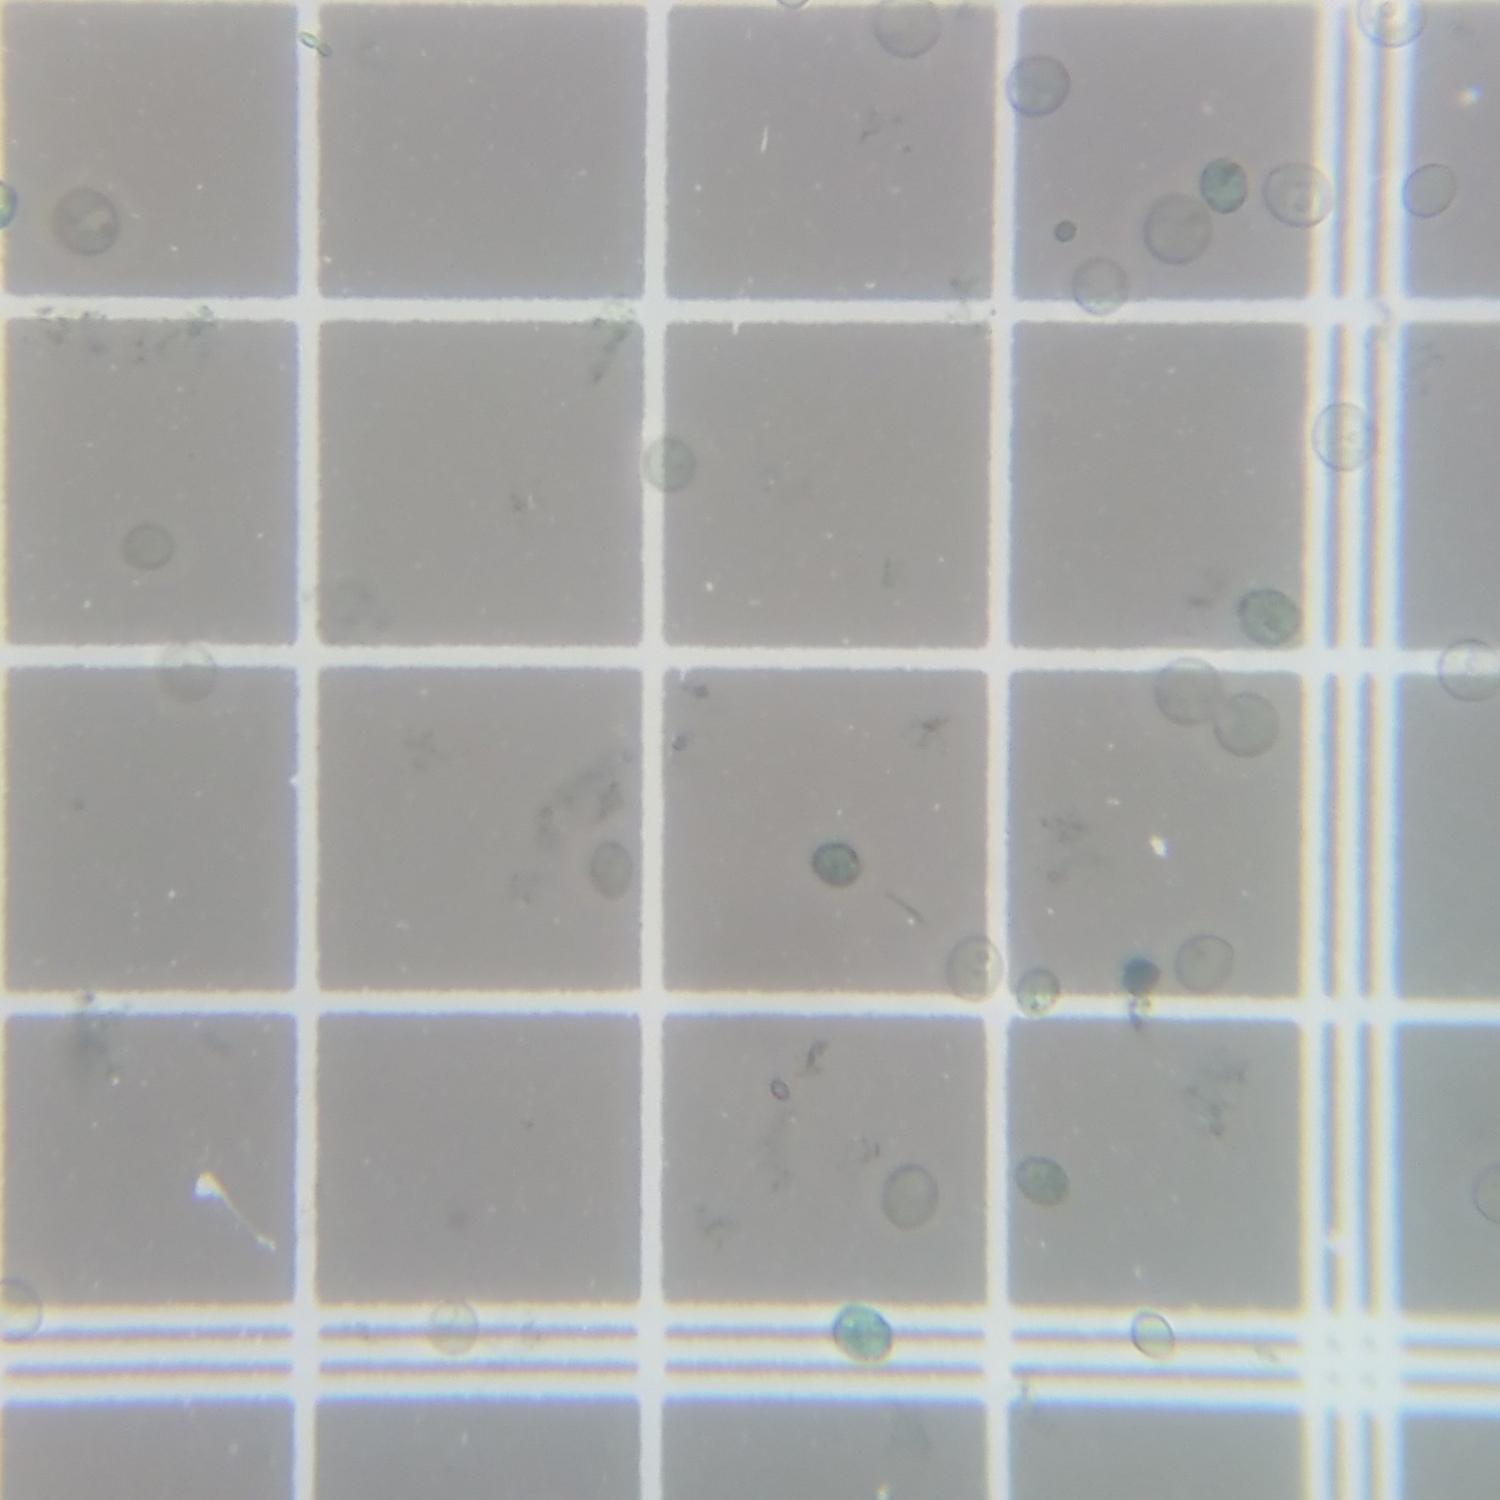

In [10]:
#import all test images
image_folder = "openlabeling/images"
image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

#test two files
print("Working with {0} images".format(len(image_files)))
print("Image examples: ")

for i in range(40, 42):
    print(image_files[i])
    display(_Imgdis(filename=image_folder + "/" + image_files[i], width=240, height=320))

In [11]:
df = pd.DataFrame(columns = ['dead','y','x','height','width','image'])

In [12]:
#import all test images
txt_folder = "openlabeling/bbox_txt"
txt_files = [f for f in os.listdir(txt_folder) if os.path.isfile(os.path.join(txt_folder, f))]

print("Working with {0} text files".format(len(txt_files)))
print("Image examples: ")

Working with 50 text files
Image examples: 


In [13]:
#read single txt file into df
file_data = pd.read_csv("openlabeling/bbox_txt/20181115_103926.txt", sep = ' ', header = None, names = ['dead','y','x','height','width','image'])
file_data['image']="openlabeling/images/20181115_103926.jpg"
#len(file_data)
file_data

int(file_data.loc[0, 'x']*1500)

121

In [14]:
file_data.x *=1500
file_data.y *=1500
file_data.width *=1500
file_data.height *=1500
file_data.x = file_data.x.astype(int)
file_data.y = file_data.y.astype(int)
file_data.width = file_data.x.astype(int)
file_data.height = file_data.y.astype(int)
file_data

dead     y     x  height  width                                    image
0      0   180   121     180    121  openlabeling/images/20181115_103926.jpg
1      0   870   179     870    179  openlabeling/images/20181115_103926.jpg
2      0  1460   119    1460    119  openlabeling/images/20181115_103926.jpg
3      0  1387   597    1387    597  openlabeling/images/20181115_103926.jpg
4      0  1161   527    1161    527  openlabeling/images/20181115_103926.jpg
5      0   642   367     642    367  openlabeling/images/20181115_103926.jpg
6      0   305   437     305    437  openlabeling/images/20181115_103926.jpg
7      0   448   481     448    481  openlabeling/images/20181115_103926.jpg
8      0   754   593     754    593  openlabeling/images/20181115_103926.jpg
9      0  1099   729    1099    729  openlabeling/images/20181115_103926.jpg
10     0  1393   978    1393    978  openlabeling/images/20181115_103926.jpg
11     0   683  1287     683   1287  openlabeling/images/20181115_103926.jpg
12     0   525  1309     525   1309  openlabeling/images/20181115_103926.jpg
13     0   379  1237     379   1237  openlabeling/images/20181115_103926.jpg
14     0   306  1208     306   1208  openlabeling/images/20181115_103926.jpg
15     0   302  1074     302   1074  openlabeling/images/20181115_103926.jpg
16     0   178   709     178    709  openlabeling/images/20181115_103926.jpg
17     0   293   541     293    541  openlabeling/images/20181115_103926.jpg
18     1   736   828     736    828  openlabeling/images/20181115_103926.jpg
19     1   601   998     601    998  openlabeling/images/20181115_103926.jpg
20     1   529   880     529    880  openlabeling/images/20181115_103926.jpg
21     1   677  1226     677   1226  openlabeling/images/20181115_103926.jpg

In [15]:
#read multiple txt file into df
frames = []
for i in range(len(txt_files)):
    #read single txt files into df
    file_data = pd.read_csv(txt_folder + "/" + txt_files[i], sep = ' ', header = None, names = ['dead','y','x','height','width','image'])

    #append dataframe with current file name
    img_file = re.sub('.txt$','.jpg',txt_files[i])
    file_data['image']="openlabeling/images/"+img_file
    frames.append(file_data)

# concatenate list of all frames into one    
result = pd.concat(frames, ignore_index=True)
print(type(result), " ", result.shape)

#convert corner points back to pixel values
cols= ['x','y','width','height']
result[cols] *=1500
result[cols]=result[cols].astype(int)

result

<class 'pandas.core.frame.DataFrame'>   (923, 6)


dead     y     x  height  width                                    image
0       0   287   126      88     70  openlabeling/images/20181115_104608.jpg
1       0   252   261      95     89  openlabeling/images/20181115_104608.jpg
2       0   118   576      80     77  openlabeling/images/20181115_104608.jpg
3       0   251   581      83     87  openlabeling/images/20181115_104608.jpg
4       0   469   549      70     70  openlabeling/images/20181115_104608.jpg
5       0   750   490      62     66  openlabeling/images/20181115_104608.jpg
6       0  1214   345      77     71  openlabeling/images/20181115_104608.jpg
7       0  1307   348      77     80  openlabeling/images/20181115_104608.jpg
8       0   319   777      79     87  openlabeling/images/20181115_104608.jpg
9       0   399   763      69     72  openlabeling/images/20181115_104608.jpg
10      0  1013   606      82     80  openlabeling/images/20181115_104608.jpg
11      0  1147   783      68     77  openlabeling/images/20181115_104608.jpg
12      0  1364  1099      77     81  openlabeling/images/20181115_104608.jpg
13      0  1262  1190      84     77  openlabeling/images/20181115_104608.jpg
14      0   803  1340      90     83  openlabeling/images/20181115_104608.jpg
15      0   652  1108      69     62  openlabeling/images/20181115_104608.jpg
16      0   354  1369      78     77  openlabeling/images/20181115_104608.jpg
17      0   124  1178      77     78  openlabeling/images/20181115_104608.jpg
18      0   690  1166      72     55  openlabeling/images/20181115_104608.jpg
19      1   108    52      85     72  openlabeling/images/20181115_104608.jpg
20      1   279    45      77     65  openlabeling/images/20181115_104608.jpg
21      1  1188   130      83     82  openlabeling/images/20181115_104608.jpg
22      1   881   445      72     74  openlabeling/images/20181115_104608.jpg
23      1  1467   500      68     85  openlabeling/images/20181115_104608.jpg
24      1  1328   930      66     78  openlabeling/images/20181115_104608.jpg
25      0   866   762      83     78  openlabeling/images/20181115_104608.jpg
26      1   459   803      82     51  openlabeling/images/20181115_104608.jpg
27      1   741  1200      60     60  openlabeling/images/20181115_104608.jpg
28      1   172   472      64     78  openlabeling/images/20181115_105421.jpg
29      0   633   114      62     67  openlabeling/images/20181115_105421.jpg
..    ...   ...   ...     ...    ...                                      ...
893     1   879   535      75     72  openlabeling/images/20181115_104533.jpg
894     1  1227  1278      72     72  openlabeling/images/20181115_104533.jpg
895     1  1295  1295      65     80  openlabeling/images/20181115_104533.jpg
896     0    74   504      81     78  openlabeling/images/20181115_104533.jpg
897     0   330   410      85     84  openlabeling/images/20181115_104533.jpg
898     0   329   501      65     63  openlabeling/images/20181115_104533.jpg
899     0   530   137      83     88  openlabeling/images/20181115_104533.jpg
900     0   939   229      70     72  openlabeling/images/20181115_104533.jpg
901     0  1137   320      72     67  openlabeling/images/20181115_104533.jpg
902     0  1081   194      79     89  openlabeling/images/20181115_104533.jpg
903     0  1021   135      62     58  openlabeling/images/20181115_104533.jpg
904     0  1311   141      95     81  openlabeling/images/20181115_104533.jpg
905     0   954   666      75     67  openlabeling/images/20181115_104533.jpg
906     0  1022   762      67     77  openlabeling/images/20181115_104533.jpg
907     0   984   918      71     70  openlabeling/images/20181115_104533.jpg
908     0   854   661      65     77  openlabeling/images/20181115_104533.jpg
909     0   949  1307      80     82  openlabeling/images/20181115_104533.jpg
910     0   430  1227      72     78  openlabeling/images/20181115_104533.jpg
911     0   430   616      88     90  openlabeling/images/20181115_104533.jpg
912     0   424   693      

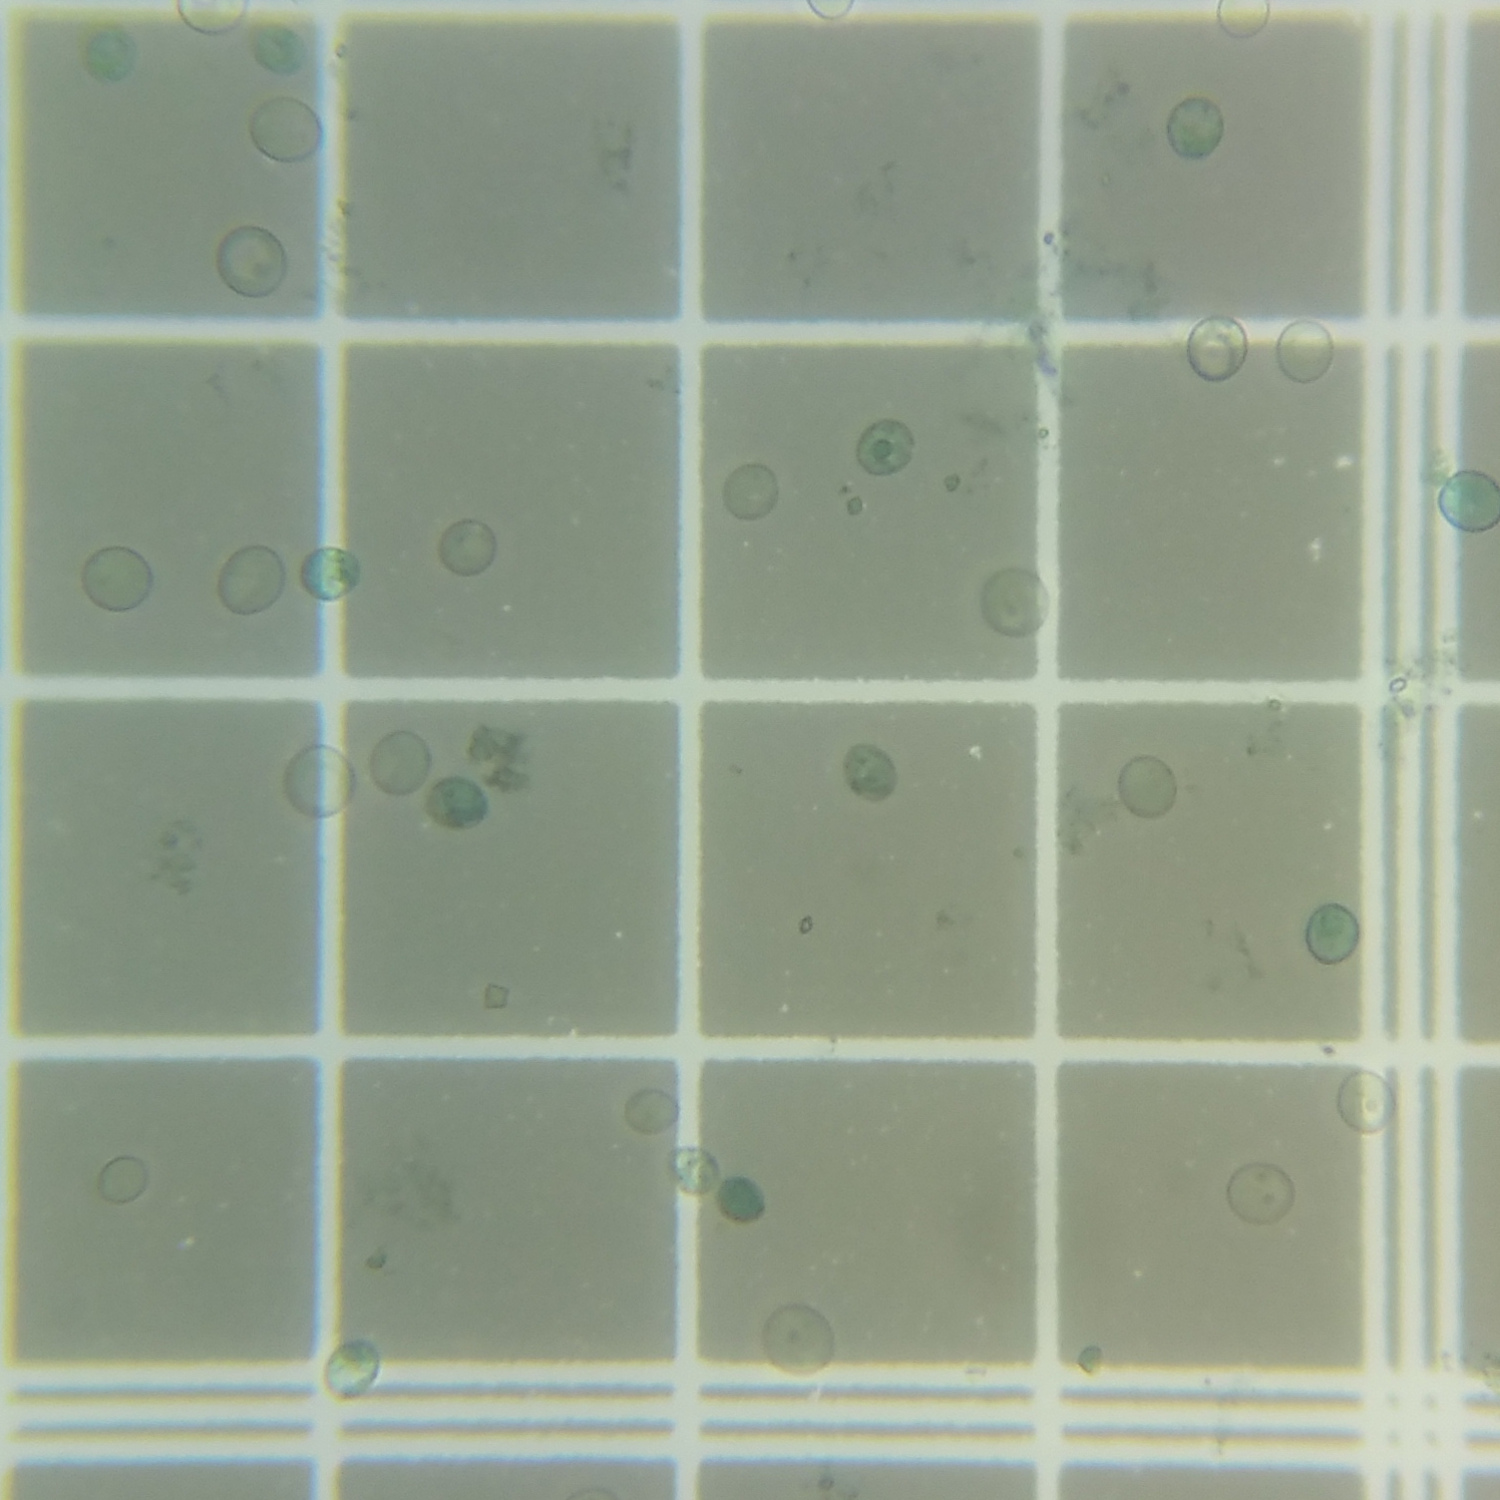

In [16]:
#bring in single image and convert to np array
img = Image.open(result.loc[1,'image'])
a = np.asarray(img)

img

1070
472
72
68
openlabeling/images/20181115_103550.jpg


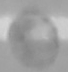

In [17]:
tnum = 0
lnum = 345

print(result.loc[lnum,'x'])
print(result.loc[lnum,'y'])
print(result.loc[lnum,'width'])
print(result.loc[lnum,'height'])
print(result.loc[lnum,'image'])

#bring in single image and convert to np array
img = Image.open(result.loc[lnum,'image'])
a = np.asarray(img)

#select area with yeast cell
b = a[int(result.loc[lnum,'x']-(result.loc[lnum,'width']/2))-tnum:int(result.loc[lnum,'x']+(result.loc[lnum,'width']/2))+tnum,
      int(result.loc[lnum,'y']-(result.loc[lnum,'height']/2))-tnum:int(result.loc[lnum,'y']+(result.loc[lnum,'height']/2))+tnum,
      
     0]


c = a[200:350,
     200:300,
     0]
i = Image.fromarray(b)
i

In [18]:
yeast_list = []

for i in range(len(result)):
    #bring in single image and convert to np array
    img = Image.open(result.loc[lnum,'image'])
    a = np.asarray(img)
    #some bounding boxes are too close to edge to be 80x80
    #select area with yeast cell
    b = a[int(result.loc[lnum,'x']-40):int(result.loc[lnum,'x']+40),
          int(result.loc[lnum,'y']-40):int(result.loc[lnum,'y']+40),
          0]
    
    
    yeast_list.append(b)
    if (i%20==0):
        print(i)

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920


In [19]:
#Scale data between 0 and 1
yeast_list[:] = [x/255 for x in yeast_list]

In [20]:
len(yeast_list)
#yeast_list[0].shape

923

In [21]:
flat_yeast_list = []
for i in range(len(yeast_list)):
    flat_yeast_list.append(list(itertools.chain.from_iterable(yeast_list[i])))

len(flat_yeast_list)

923

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    flat_yeast_list, result['dead'], test_size=0.33, random_state=42)


In [23]:
print(y_train[19])
X_train[19]

1


[0.6352941176470588,
 0.6352941176470588,
 0.6352941176470588,
 0.6274509803921569,
 0.6274509803921569,
 0.6313725490196078,
 0.6313725490196078,
 0.6313725490196078,
 0.6313725490196078,
 0.6313725490196078,
 0.6352941176470588,
 0.6352941176470588,
 0.6352941176470588,
 0.6352941176470588,
 0.6352941176470588,
 0.6392156862745098,
 0.6392156862745098,
 0.6392156862745098,
 0.6392156862745098,
 0.6392156862745098,
 0.6392156862745098,
 0.6392156862745098,
 0.6352941176470588,
 0.6313725490196078,
 0.6313725490196078,
 0.6313725490196078,
 0.6274509803921569,
 0.6313725490196078,
 0.6313725490196078,
 0.6352941176470588,
 0.6352941176470588,
 0.6313725490196078,
 0.6313725490196078,
 0.6313725490196078,
 0.6313725490196078,
 0.6274509803921569,
 0.6235294117647059,
 0.6235294117647059,
 0.6235294117647059,
 0.6235294117647059,
 0.6235294117647059,
 0.6235294117647059,
 0.6235294117647059,
 0.6235294117647059,
 0.6235294117647059,
 0.6274509803921569,
 0.6274509803921569,
 0.6274509803

In [24]:
clf = tree.DecisionTreeClassifier()
clf.fit(X=X_train, y=y_train)
clf.score(X=X_test, y=y_test)

0.8721311475409836